### Code by: Apurva Umredkar (50592382)

- Phase 1 accomplishments: Dataset retrieval, data cleaning and exploratory data analysis (EDA). - Oct 8 2024
- Phase 2 objective: More data cleaning, apply ML algorithms for classifying mentality of gamers - Nov 5 2024

In [41]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [42]:
# Reading the dataset
gaming_dat = pd.read_csv(r"../data/online-gaming-anxiety-data/GamingStudy_data.csv", encoding = 'ISO-8859-1')
# dataset size
gaming_dat.shape, gaming_dat.columns

((13464, 55),
 Index(['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6',
        'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game',
        'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague',
        'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
        'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
        'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Gender', 'Age',
        'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
        'accept', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3',
        'Birthplace_ISO3'],
       dtype='object'))

In [43]:
# data cleaning: S. No. and timestamp are irrelevant, dropping these columns
gaming_dat = gaming_dat.drop(
    columns=["S. No.", "Timestamp", "highestleague"], axis=1)

# data cleaning 2: replace NaN values to 0
# gaming_dat = gaming_dat.fillna(0)

gaming_dat.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,0,0,0,0,1,0,0,Not difficult at all,3,5,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,0,2,2,0,0,3,1,Not difficult at all,2,6,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,0,0,0,0,0,0,0,Not difficult at all,2,5,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,2,1,2,2,2,3,2,Very difficult,2,2,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [44]:
# !!! CODE INSERTED DURING PHASE 2 !!!
# Some more data cleaning is required. Previously I had simply replaced NaN values in the dataset with 0 for an initial EDA
# This approach will not be helpful when we want to apply ML models, so let's update that

# First let's check exactly where we have missing values
gaming_dat.isnull().sum()

GAD1                  0
GAD2                  0
GAD3                  0
GAD4                  0
GAD5                  0
GAD6                  0
GAD7                  0
GADE                649
SWL1                  0
SWL2                  0
SWL3                  0
SWL4                  0
SWL5                  0
Game                  0
Platform              0
Hours                30
earnings              0
whyplay               0
League             1852
streams             100
SPIN1               124
SPIN2               154
SPIN3               140
SPIN4               159
SPIN5               166
SPIN6               156
SPIN7               138
SPIN8               144
SPIN9               158
SPIN10              160
SPIN11              187
SPIN12              168
SPIN13              187
SPIN14              156
SPIN15              147
SPIN16              147
SPIN17              175
Narcissism           23
Gender                0
Age                   0
Work                 38
Degree          

In [45]:
# (From Kaggle data card) Our 3 categories of interest are GAD, SWL & SPIN. Out of which SPIN columns have a lot of null values
num_col = ['SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
                  'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12',
                  'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Hours',
                  'streams','Narcissism','SPIN_T']

# replacing null values in above columns with the average numerical value
from sklearn.impute import SimpleImputer
numerical_imputer = SimpleImputer(missing_values=np.nan , strategy = 'mean')

for i in num_col:
  gaming_dat[num_col] = numerical_imputer.fit_transform(gaming_dat[num_col])

In [46]:
# there are some other non-numerical columns with null values
# we will replace nulls with maximum occuring value (mode)
categorical_imputer = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
categ_cols = ['GADE','League','Work','Degree','Reference','accept','Residence_ISO3','Birthplace_ISO3']

for i in categ_cols:
  gaming_dat[categ_cols] = categorical_imputer.fit_transform(gaming_dat[categ_cols])

In [47]:
# verifying if all null values have been handled
gaming_dat.isnull().sum()

GAD1               0
GAD2               0
GAD3               0
GAD4               0
GAD5               0
GAD6               0
GAD7               0
GADE               0
SWL1               0
SWL2               0
SWL3               0
SWL4               0
SWL5               0
Game               0
Platform           0
Hours              0
earnings           0
whyplay            0
League             0
streams            0
SPIN1              0
SPIN2              0
SPIN3              0
SPIN4              0
SPIN5              0
SPIN6              0
SPIN7              0
SPIN8              0
SPIN9              0
SPIN10             0
SPIN11             0
SPIN12             0
SPIN13             0
SPIN14             0
SPIN15             0
SPIN16             0
SPIN17             0
Narcissism         0
Gender             0
Age                0
Work               0
Degree             0
Birthplace         0
Residence          0
Reference          0
Playstyle          0
accept             0
GAD_T        

Analysis: What are the age of the gamers present in our dataset and what is the mean age?

Mean age of the gamers: 21


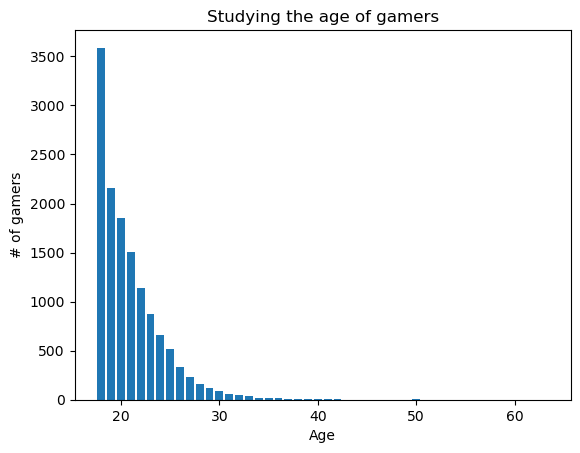

In [48]:
mean_age = np.mean(gaming_dat["Age"])
print(f"Mean age of the gamers: {np.round(mean_age,0):.0f}")

age_count = gaming_dat['Age'].value_counts().reset_index()
plt.bar(age_count["Age"], age_count["count"])
plt.title("Studying the age of gamers")
plt.xlabel("Age")
plt.ylabel("# of gamers")
plt.show()

We can observe that most of the gamers are of the age 18 and the mean age of the gamers in our dataset is 21.

### Hypothesis 1
#### Which country has the highest average of anxiety levels in online gamers?

Approach: The GAD columns contain metrics for General Anxiety Disorder from category 1 to 7. We will take the average of these and group by country, and get the highest and lowest average value.

**A little background on the anxiety terminologies**

In Psychology, General Anxiety Disorder (GAD) has been divided into 7 categories:
1. GAD-1: Feeling nervous, anxious or on edge
2. GAD-2: Not being able to stop or control worrying
3. GAD-3: Worrying too much about different things
4. GAD-4: Trouble relaxing
5. GAD-5: Being so restless that it is hard to sit still
6. GAD-6: Becoming easily annoyed or irritable
7. GAD-7: Feeling afraid as if something awful might happen

The answer to GAD categories can be 0 - Not at all, 1 - Several days, 2 - More than half the days, 3 - Nearly everyday

SWL refers to Satisfaction with Life.

Here, a survey was conducted to curate this dataset which consisted of 5 questions which had to be answered with a SWL score on a scale of 1-5, 1 being Strongly disagree and 5 being Strongly Agree.

In [49]:
# Step 1: Calculate total GAD score per participant
gaming_dat['GAD_total'] = gaming_dat[['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7']].sum(axis=1)

# Step 2: Group by country and calculate average GAD score
country_anxiety = gaming_dat.groupby('Residence_ISO3')['GAD_total'].mean()

# Step 3: Sort countries by average GAD score
country_anxiety_sorted = country_anxiety.sort_values(ascending=False).reset_index()

print(f"Based on online gaming data")
print(f"Highest average anxiety: {country_anxiety_sorted.iloc[0,0]} - {country_anxiety_sorted.iloc[0,1]}")
print(f"Lowest average anxiety: {country_anxiety_sorted.iloc[-1,0]} - {country_anxiety_sorted.iloc[-1,1]} ")

Based on online gaming data
Highest average anxiety: QAT - 16.333333333333332
Lowest average anxiety: FJI - 0.0 


Conclusion: Online gamers from Qatar have the highest anxiety levels and gamers from Fiji have the lowest anxiety levels.

But how about the satisfaction with life? Let's implement the same averaging approach but with SWL scores instead.

In [50]:
gaming_dat['SWL_total'] = gaming_dat[['SWL1', 'SWL2', 'SWL5', 'SWL4', 'SWL5']].sum(axis=1)
country_swl = gaming_dat.groupby('Residence_ISO3')['SWL_total'].mean()
country_swl_sorted = country_swl.sort_values(ascending=False).reset_index().rename(columns={"SWL_total": "SWL_avg"})

print(f"Highest SWL average: {country_swl_sorted.iloc[0,0]} - {country_swl_sorted.iloc[0,1]}")
print(f"Highest SWL average: {country_swl_sorted.iloc[-1,0]} - {country_swl_sorted.iloc[-1,1]}")

print(f"Qatar SWL: {country_swl_sorted.loc[country_swl_sorted['Residence_ISO3'] == 'QAT', 'SWL_avg'].values[0]}")
print(f"Fiji SWL: {country_swl_sorted.loc[country_swl_sorted['Residence_ISO3'] == 'FJI', 'SWL_avg'].values[0]}")

Highest SWL average: NAM - 35.0
Highest SWL average: IDN - 8.0
Qatar SWL: 19.666666666666668
Fiji SWL: 12.0


Findings: Namibia has the highest SWL avg, whereas Indonesia has the least SWL average. Even though gamers in Qatar have the highest anxiety disorder, they have a moderate satisfaction with life.

### Hypothesis 2
#### Which age group suffers from the most anxiety?

In [51]:
# Mapping the GAD statement to the corresponding column names in the dataset
gad_statements = {
    'GAD1': 'Feeling nervous, anxious, or on edge',
    'GAD2': 'Not being able to stop or control worrying',
    'GAD3': 'Worrying too much about different things',
    'GAD4': 'Trouble relaxing',
    'GAD5': 'Being so restless that it`s hard to sit still',
    'GAD6': 'Becoming easily annoyed or irritable',
    'GAD7': 'Feeling afraid as if something awful might happen'
}

statement_columns = list(gad_statements.keys())
statement_labels = list(gad_statements.values())

In [52]:
gaming_dat_copy = gaming_dat.copy()

# Creating bins for age
age_bins = [18, 20, 25, 30, 100]
age_labels = ['18-20', '20-25', '25-30', '30+']
gaming_dat_copy['AgeBin'] = pd.cut(gaming_dat_copy.Age, age_bins, labels=age_labels)

# Creating bins for hours played per week
hour_bins = [0, 20, 40, 60, 80, 120]
hour_labels = ['0-20', '20-40', '40-60', '60-80', '80+']
gaming_dat_copy['HoursBin'] = pd.cut(gaming_dat_copy.Hours, hour_bins, labels=hour_labels)

# Prepare data for radar charts
radar_data = gaming_dat_copy.groupby(['AgeBin', 'HoursBin'])[statement_columns].mean().reset_index()

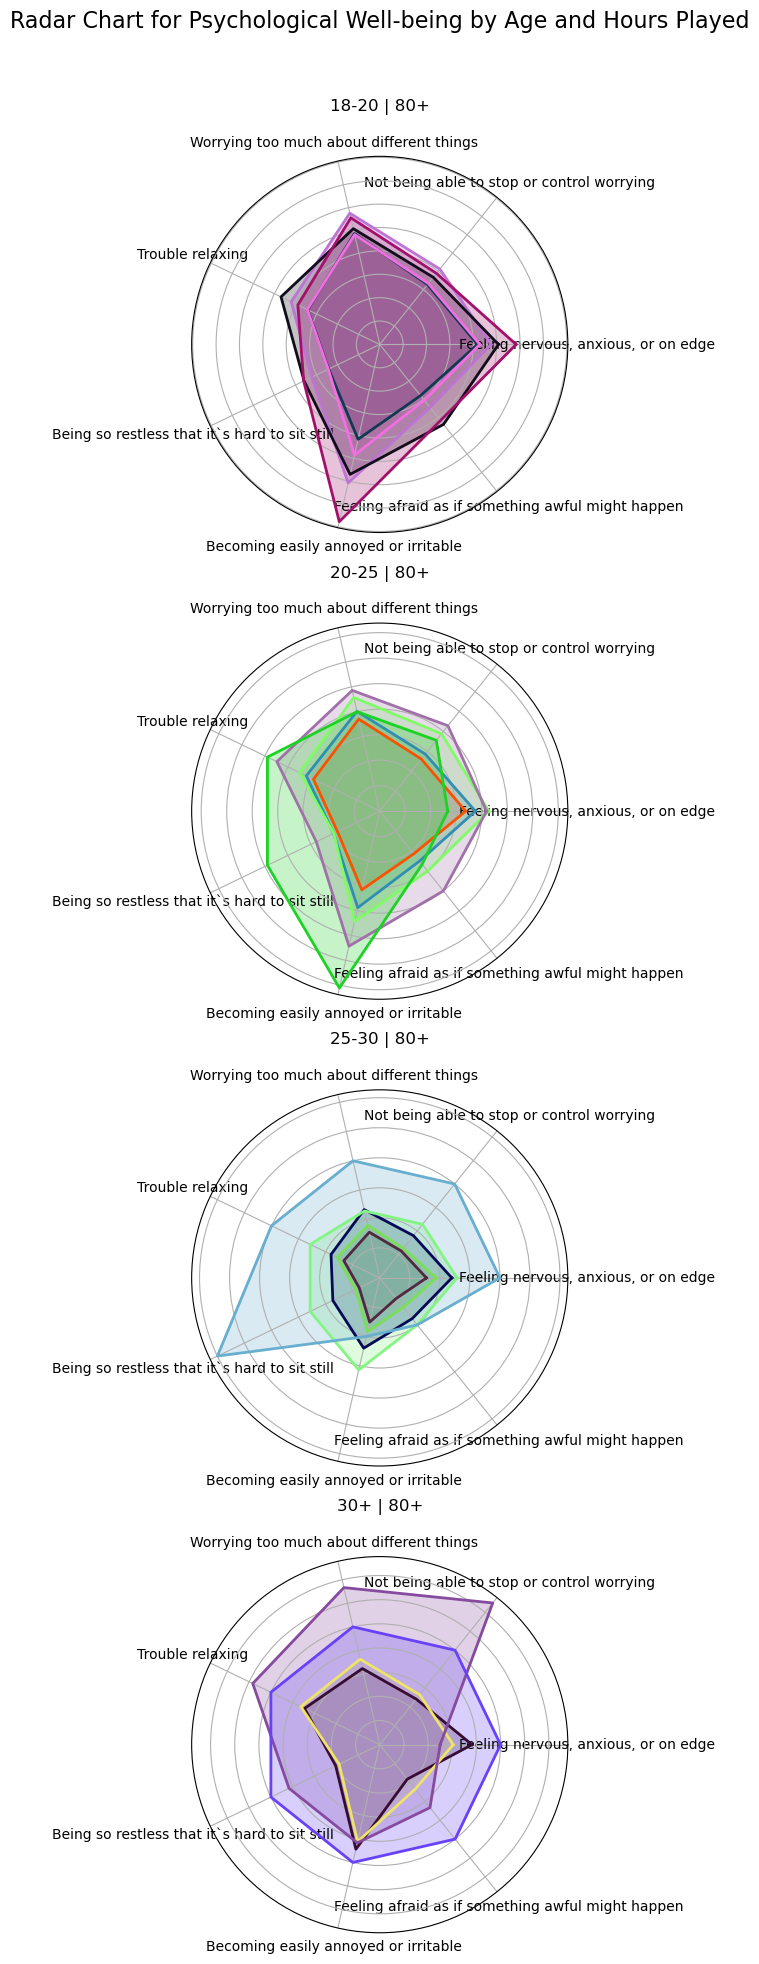

In [54]:
# Number of variables we're plotting (number of statements)
num_vars = len(statement_labels)

# Function to create radar chart
def radar_chart(ax, values, labels, color='blue', fill=True):
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values = values.tolist()
    
    # Ensure values close the loop
    values += values[:1]
    angles += angles[:1]

    # Draw the outline of the radar chart
    ax.plot(angles, values, color=color, linewidth=2)
    if fill:
        ax.fill(angles, values, color=color, alpha=0.25)
    
    # Set the labels for each axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Hide radial ticks
    ax.set_yticklabels([])

# Create subplots for each age zone
fig, axes = plt.subplots(len(age_labels), 1, figsize=(10, 20),
                         subplot_kw=dict(projection='polar'))
if len(age_labels) == 1:
    axes = [axes]  # Ensure axes is a list even for one subplot

# Iterate over each age zone and add radar plots
for idx, age_zone in enumerate(age_labels):
    age_data = radar_data[radar_data['AgeBin'] == age_zone]
    
    for _, row in age_data.iterrows():
        radar_chart(
            axes[idx],
            row[statement_columns].values,
            statement_labels,
            color=np.random.rand(3,)
        )
        axes[idx].set_title(f"{row['AgeBin']} | {row['HoursBin']}", size=12, color='black', y=1.1)

# Set a title for the entire figure
plt.suptitle("Radar Chart for Psychological Well-being by Age and Hours Played", size=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to accommodate the title
plt.show()


**Conclusion** \
From the radar charts, it can be seen that young gamers from the age group 18-25 suffer from more anxiety in all areas.

Age group 18-20 & 21-25 is feeling afraid as if something awful might happen (GAD-7) \
Age group 25-30 is mostly restless and find it hard to sit still (GAD-5) \
Ages 30+ are mostly not able to stop or control worrying (GAD-2)